# **Group 13**:
Evan Garcia, Jacob Ramos, Casey Kwinn, Daniel Cook

# **Project**: Traffic Volume

Traffic is a daily dilemma that most people face in their life way too many times. The average driver in America spends 293 hrs annually behind the wheel.

Our group goal is to predict metro traffic volume based on:
Hourly weather features, 
Temperature,
Holidays,
 & Date/Time.

We will use a dataset that contains the number of instances of metro traffic during different conditions and features. We want to run and use different regression models to measure and figure out what attributes/features causes the most noticeable effect in traffic. Some techniques we plan to use are the K-Mean Clustering and Cross-Validation. (Do EDA here i guess).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.cluster import KMeans
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
df = df.fillna(0)
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


This is our graph that has 9 columns: Holiday, Temp, Rain1Hour, Snow1Hour, CloudAll, MainWeather, WeatherDescription, DateTime, and TrafficVolume. To start our EDA, we first want to figure out how many unique values there are in each category.

In [2]:
df2 = df
df2.nunique(axis=0)

holiday                   12
temp                    5843
rain_1h                  372
snow_1h                   12
clouds_all                60
weather_main              11
weather_description       38
date_time              40575
traffic_volume          6704
dtype: int64

We are now checking the means, count, min, max, and more about this dataset and put it in scientific notation

In [3]:
df2.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


To go further in examining the data, we will focus on getting a better understanding of the variables and values.

In [4]:
df2.weather_main.unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [5]:
df2.snow_1h.unique()

array([0.  , 0.51, 0.32, 0.06, 0.05, 0.21, 0.25, 0.44, 0.13, 0.1 , 0.17,
       0.08])

In [6]:
df2.holiday.unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [7]:
df2.clouds_all.unique()

array([ 40,  75,  90,   1,  20,   0, 100,  92,  99,  81,  50,  72,  56,
        57,  93,  85,  68,  87,  91,  96,  48,  60,   8,  38,  46,  98,
        86,  16,   6,  59,  54,  89,  78,  36,  17,  58,  63,  42,  25,
        11,  13,  83,  70,  84,   3,  77,  88,  67,  97,  62,  32,   4,
         5,   2,  44,  24,  76,  64,  80,  12], dtype=int64)

In [8]:
df2.rain_1h.unique()

array([0.0000e+00, 2.5000e-01, 5.7000e-01, 3.8000e-01, 3.0000e-01,
       2.9000e-01, 4.4000e-01, 3.6000e-01, 2.1600e+00, 3.3900e+00,
       8.4000e-01, 7.6000e-01, 5.1000e-01, 6.9000e-01, 1.0000e+00,
       1.2900e+00, 1.3400e+00, 1.8400e+00, 1.7000e+00, 4.7000e-01,
       1.4100e+00, 1.4400e+00, 7.0000e-01, 3.1800e+00, 6.1000e-01,
       6.4000e-01, 1.0200e+00, 5.4200e+00, 8.6400e+00, 5.7400e+00,
       4.9800e+00, 3.6500e+00, 6.8000e-01, 4.6000e-01, 4.2000e-01,
       1.5200e+00, 8.9000e-01, 1.4000e+00, 1.2190e+01, 2.2900e+00,
       7.5400e+00, 6.9400e+00, 1.6380e+01, 1.7800e+00, 2.5400e+00,
       9.1400e+00, 3.0500e+00, 1.6500e+00, 4.4450e+01, 3.8100e+00,
       5.8400e+00, 3.5600e+00, 7.3700e+00, 1.3500e+00, 1.6000e+01,
       1.0540e+01, 1.2700e+00, 5.0800e+00, 1.9900e+01, 2.5320e+01,
       2.1420e+01, 5.5900e+00, 7.1100e+00, 5.9700e+00, 9.5300e+00,
       2.0300e+00, 5.5630e+01, 1.3210e+01, 6.6000e+00, 5.6000e-01,
       3.2000e-01, 2.3700e+00, 3.9800e+00, 4.3200e+00, 1.9600e

In [9]:
df2.weather_description.unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

While examining the unique values, one thing we notice in weather description is that some of it is similar to each other, such as 'thunderstorm with light drizzle' and 'thunderstorm with drizzle'. This is redundant and we want to reclassify some of these descriptions.

In [10]:
def clean_weather_description(row):
    
    simplifythunderstormrain = ['thunderstorm with light rain', 'thunderstorm with rain', 'thunderstorm with heavy rain' ]
    simplifythunderstormdrizzle = ['thunderstorm with drizzle', 'thunderstorm with light drizzle']
    simplifydrizzle = ['light intensity drizzle', 'drizzle', 'heavy intensity drizzle']
    
    if row.weather_description in simplifythunderstormrain:
        return 'thunderstorm with rain'   
    if row.weather_description in simplifythunderstormdrizzle:
        return 'thunderstorm with drizzle' 
    if row.weather_description in simplifydrizzle:
        return 'drizzle'   
    return row.weather_description # Clean dataframe
def clean_df(playlist):
    df_cleaned = df2.copy()
    df_cleaned['weather_description'] = df_cleaned.apply(lambda row: clean_weather_description(row), axis=1)
    return df_cleaned# Get df with reclassfied 'condition' column
df_cleaned = clean_df(df2)
df_cleaned.weather_description.unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain', 'drizzle', 'mist',
       'haze', 'fog', 'proximity shower rain', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with rain', 'proximity thunderstorm with rain',
       'heavy snow', 'snow', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'proximity thunderstorm with drizzle', 'thunderstorm',
       'Sky is Clear', 'very heavy rain', 'thunderstorm with drizzle',
       'light snow', 'smoke', 'shower drizzle', 'light shower snow',
       'sleet'], dtype=object)

As shown, we reduced some of the variables that were redundant. (Might do more with other columns possibly)

## **Main Part**

For our project, we are going to use K-Mean Clustering on our dataset to find clusters that show the attributes that have the most influence on metropolitan traffic. (Just testing and messing with data)

In [11]:
x = df[['temp', 'traffic_volume']].copy()
x

,temp,traffic_volume
0,288.28,5545
1,289.36,4516
2,289.58,4767
3,290.13,5026
4,291.14,4918
...,...,...
48199,283.45,3543
48200,282.76,2781
48201,282.73,2159
48202,282.09,1450


In [12]:
kmean = KMeans(3)
kmean.fit(x)
identified_clusters = kmean.fit_predict(x)
identified_clusters

array([0, 0, 0, ..., 2, 1, 1])

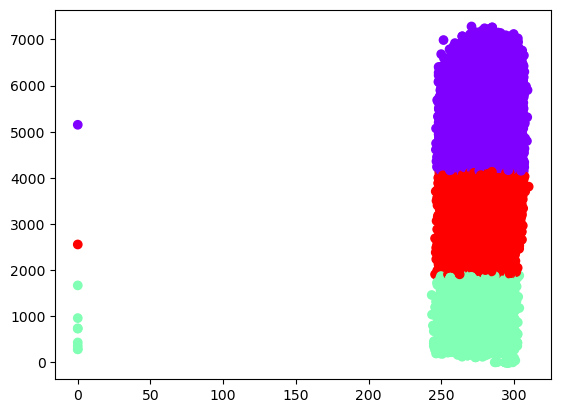

In [13]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['temp'],data_with_clusters['traffic_volume'],c=data_with_clusters['Clusters'],cmap='rainbow')

This is just to see if a elbow test can work

Text(0, 0.5, 'WCSS')

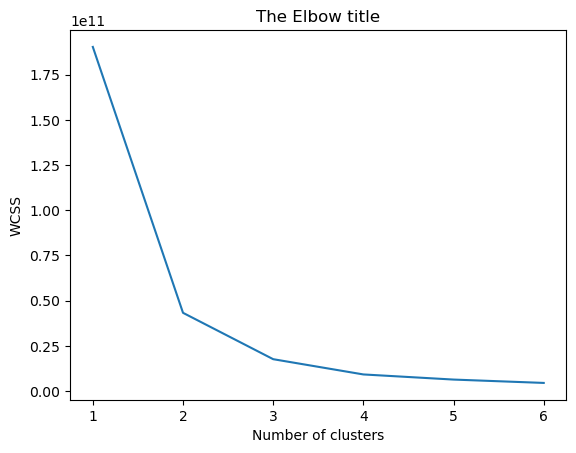

In [14]:
wcss = []
for i in range(1,7):
    kmean = KMeans(i)
    kmean.fit(x)
    wcss_iter = kmean.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

did temp and traffic, now clouds and traffic

In [15]:
y = df[['clouds_all', 'traffic_volume']].copy()
y

,clouds_all,traffic_volume
0,40,5545
1,75,4516
2,90,4767
3,90,5026
4,75,4918
...,...,...
48199,75,3543
48200,90,2781
48201,90,2159
48202,90,1450


In [16]:
kmean2 = KMeans(3)
kmean2.fit(y)
identified_clusters2 = kmean2.fit_predict(y)
identified_clusters2

array([1, 1, 1, ..., 0, 2, 2])

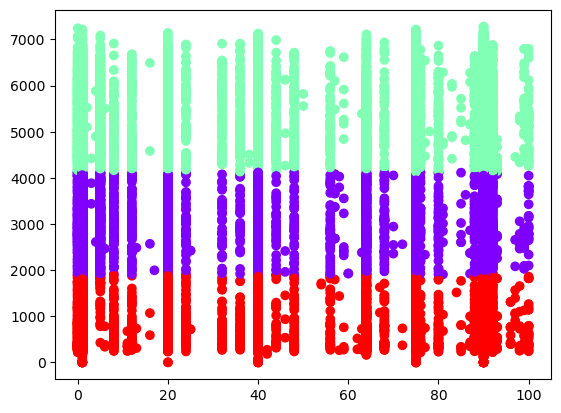

In [17]:
data_with_clusters2 = df.copy()
data_with_clusters2['Clusters'] = identified_clusters2 
plt.scatter(data_with_clusters2['clouds_all'],data_with_clusters2['traffic_volume'],c=data_with_clusters2['Clusters'],cmap='rainbow')

C:\Users\garth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


       traffic_level  traffic_volume
0                  2            5545
1                  2            4516
2                  2            4767
3                  2            5026
4                  2            4918
...              ...             ...
48199              1            3543
48200              1            2781
48201              1            2159
48202              0            1450
48203              0             954

[48204 rows x 2 columns]


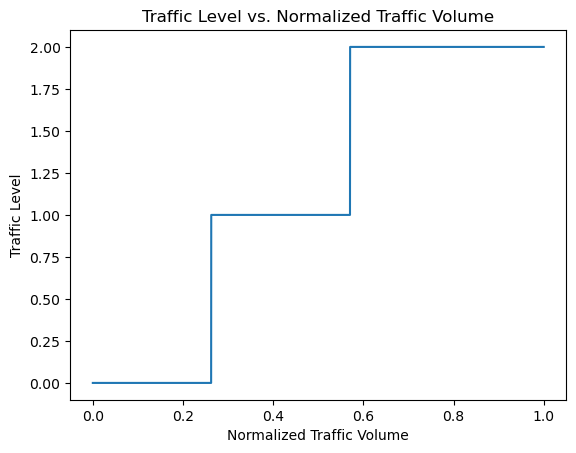

In [18]:
#df['traffic_volume'] = df['traffic_volume'].astype(float)
#kmeans = KMeans(n_clusters=3, random_state=0).fit(df['traffic_volume'])

# add the cluster labels to the dataframe
#df['traffic_level'] = kmeans.labels_
from sklearn.cluster import KMeans

# reshape the data to have two dimensions
data = np.array(df['traffic_volume']).reshape(-1, 1)
sorted_data = np.sort(df['traffic_volume'])
initial_centroids = np.array([
    [sorted_data[int(0 * len(sorted_data) / 100)]],
    [sorted_data[int(50 * len(sorted_data) / 100)]],
    [sorted_data[int(100 * (len(sorted_data)-1) / 100)]]
])

# fit KMeans model with specified initial centroids
kmeans = KMeans(n_clusters=3, init=initial_centroids).fit(data)

# add the cluster labels to the dataframe
df['traffic_level'] = kmeans.labels_
print(df[['traffic_level', 'traffic_volume']])
# sort the DataFrame by 'traffic_volume' column
df = df.sort_values('traffic_volume')

# normalize the 'traffic_volume' column between 0 and 1
df['normalized_traffic_volume'] = (df['traffic_volume'] - df['traffic_volume'].min()) / (df['traffic_volume'].max() - df['traffic_volume'].min())

# plot the line chart
plt.plot(df['normalized_traffic_volume'], df['traffic_level'])
plt.xlabel('Normalized Traffic Volume')
plt.ylabel('Traffic Level')
plt.title('Traffic Level vs. Normalized Traffic Volume')
plt.show()

In [19]:
rain = df[['rain_1h', 'traffic_volume']].copy()
rain

,rain_1h,traffic_volume
25186,0.0,0
25191,0.0,0
24821,0.0,1
16849,0.0,1
26438,0.0,1
...,...,...
5619,0.0,7217
22671,0.0,7241
22640,0.0,7260
22641,0.0,7260


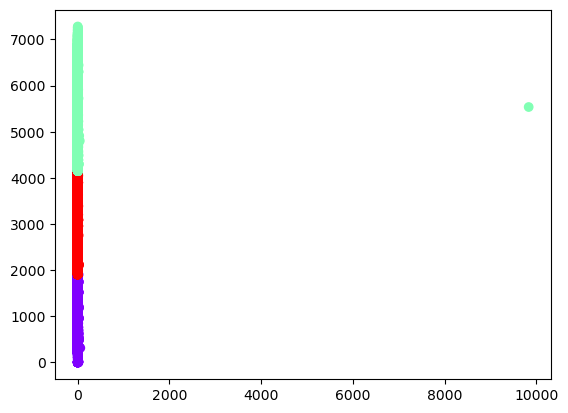

In [20]:
kmean3 = KMeans(3)
kmean3.fit(rain)
identified_clusters3 = kmean3.fit_predict(rain)
data_with_clusters3 = df.copy()
data_with_clusters3['Clusters'] = identified_clusters3
plt.scatter(data_with_clusters3['rain_1h'],data_with_clusters3['traffic_volume'],c=data_with_clusters3['Clusters'],cmap='rainbow')

In [21]:
snow = df[['snow_1h', 'traffic_volume']].copy()
snow

,snow_1h,traffic_volume
25186,0.0,0
25191,0.0,0
24821,0.0,1
16849,0.0,1
26438,0.0,1
...,...,...
5619,0.0,7217
22671,0.0,7241
22640,0.0,7260
22641,0.0,7260


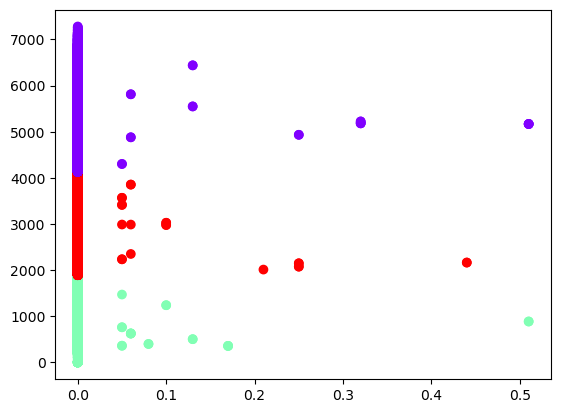

In [22]:
kmean4 = KMeans(3)
kmean4.fit(snow)
identified_clusters4 = kmean4.fit_predict(rain)
data_with_clusters4 = df.copy()
data_with_clusters4['Clusters'] = identified_clusters4
plt.scatter(data_with_clusters4['snow_1h'],data_with_clusters4['traffic_volume'],c=data_with_clusters4['Clusters'],cmap='rainbow')

In [23]:
time = df[['date_time', 'traffic_volume']].copy()
time

,date_time,traffic_volume
25186,2016-07-23 18:00:00,0
25191,2016-07-23 23:00:00,0
24821,2016-07-09 23:00:00,1
16849,2015-07-25 08:00:00,1
26438,2016-09-07 23:00:00,1
...,...,...
5619,2013-04-30 07:00:00,7217
22671,2016-04-22 07:00:00,7241
22640,2016-04-21 07:00:00,7260
22641,2016-04-21 07:00:00,7260
